In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rental-apartments-in-kenya/rent_apts.csv


In [2]:
df = pd.read_csv("/kaggle/input/rental-apartments-in-kenya/rent_apts.csv")

In [3]:
df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [4]:
df.columns

Index(['Agency', 'Neighborhood', 'Price', 'link', 'sq_mtrs', 'Bedrooms',
       'Bathrooms'],
      dtype='object')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [6]:
df.isnull().sum()

Agency            0
Neighborhood      0
Price             0
link              0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

In [9]:
# Fill missing values with the median
df['Bedrooms'].fillna(df['Bedrooms'].median(),inplace=True)
df['Bathrooms'].fillna(df['Bathrooms'].median(), inplace=True)
df['sq_mtrs'].fillna(df['sq_mtrs'].mode().iloc[0], inplace=True)

In [10]:
df[['Bedrooms', 'Bathrooms', 'sq_mtrs']].isnull().sum()

Bedrooms     0
Bathrooms    0
sq_mtrs      0
dtype: int64

In [31]:
df.describe()

,Price,sq_mtrs,Bedrooms,Bathrooms
count,1848.000000,1848.000000,1848.000000,1848.000000
mean,97343.881494,326.876082,2.578463,2.501623
std,40241.322051,2047.702796,0.818910,0.943445
min,12000.000000,0.000000,0.000000,1.000000
25%,70000.000000,2.000000,2.000000,2.000000
50%,95000.000000,3.000000,3.000000,2.000000
75%,130000.000000,4.000000,3.000000,3.000000
max,280000.000000,40470.000000,6.000000,6.000000


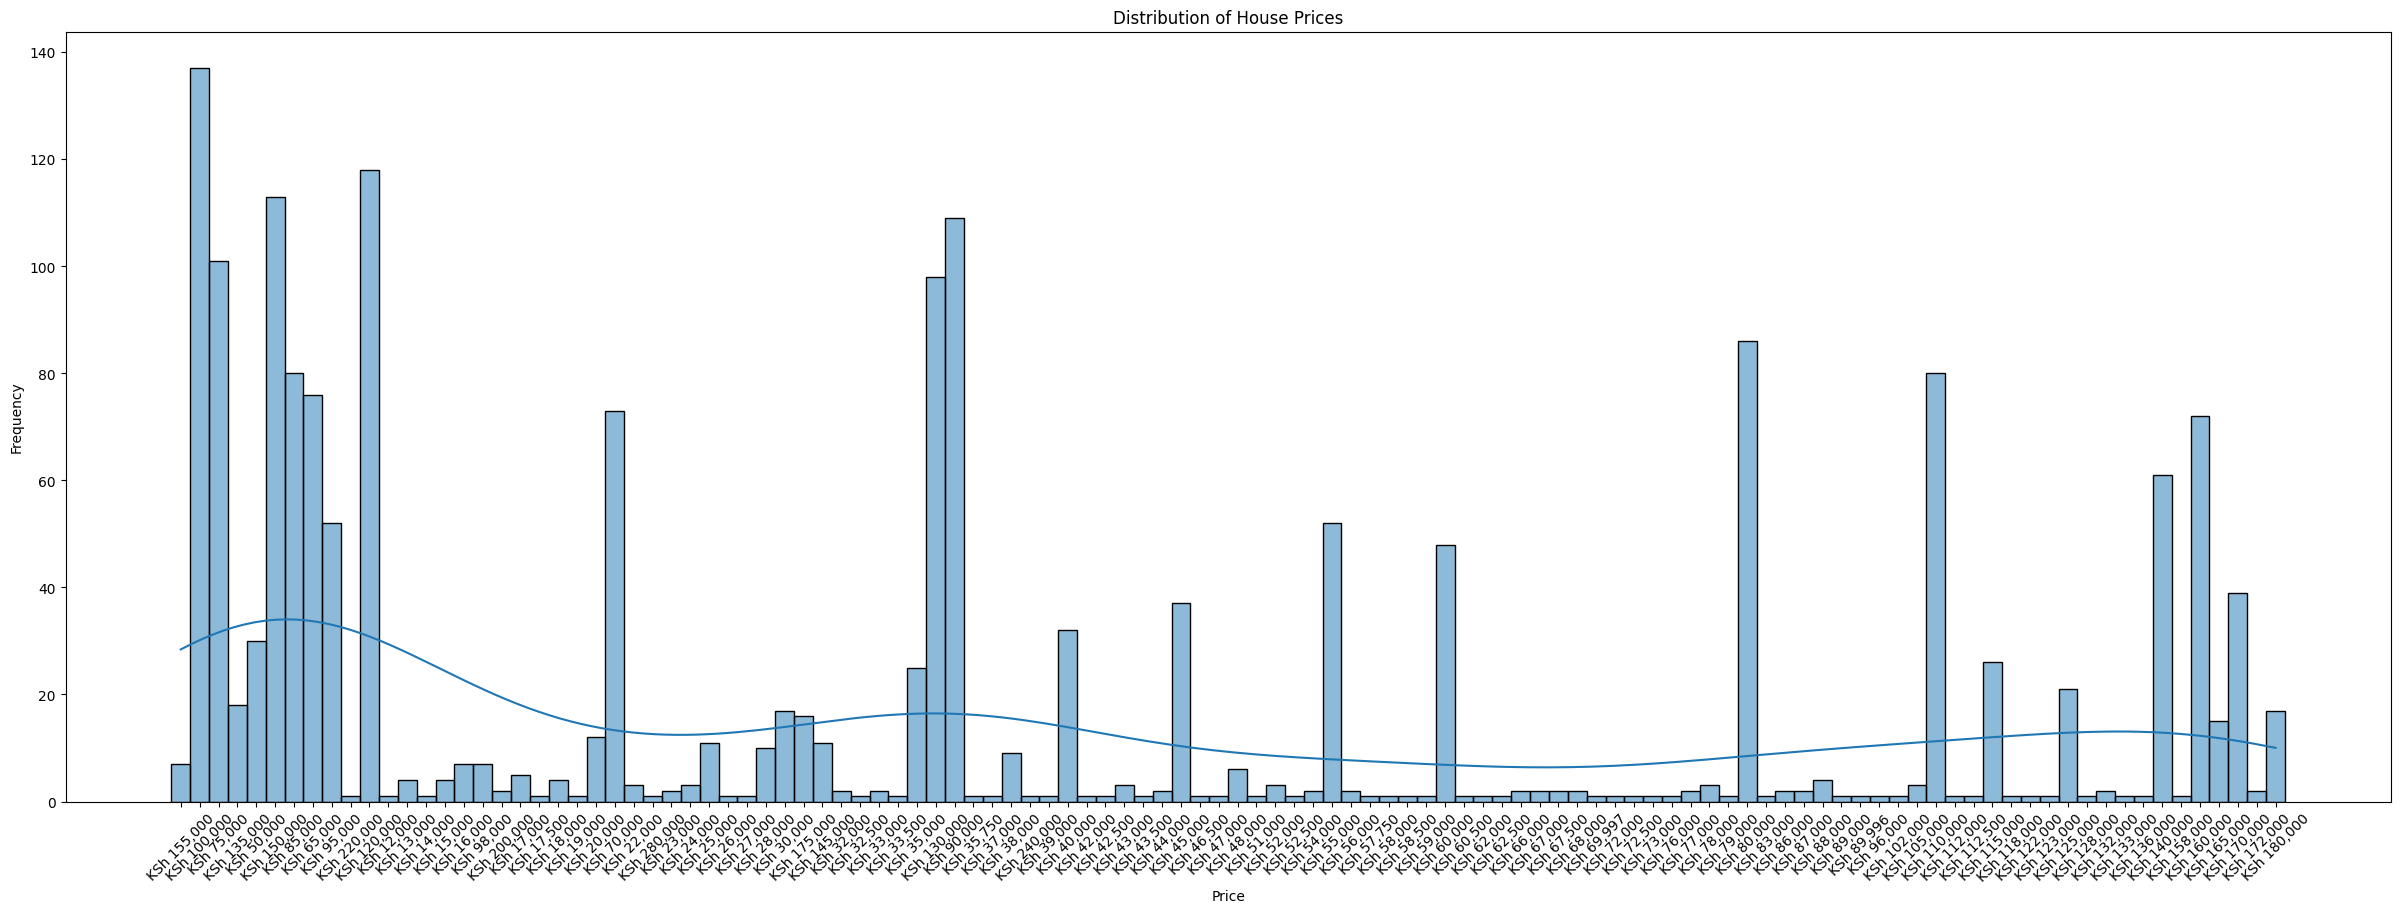

In [19]:
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(30, 10))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

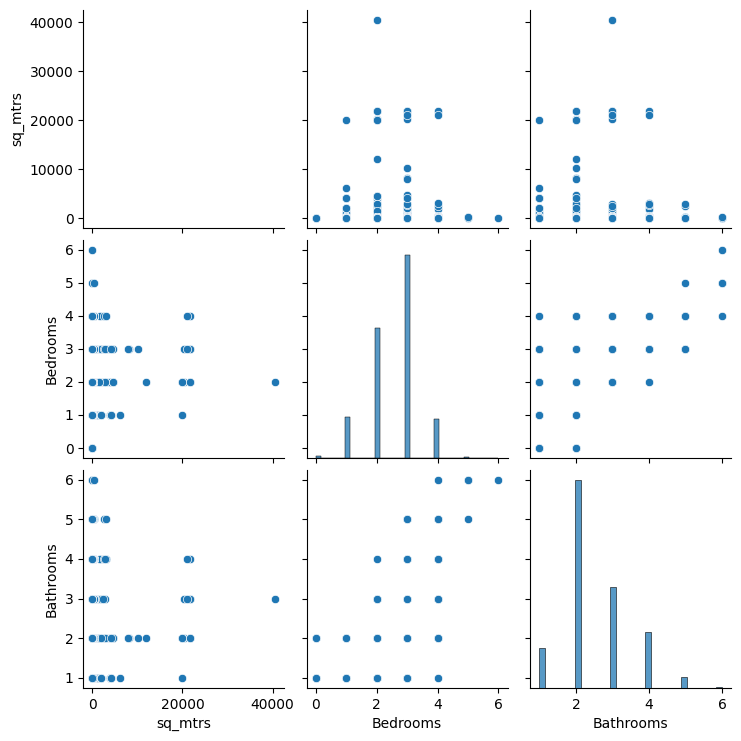

In [18]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['Price', 'sq_mtrs', 'Bedrooms', 'Bathrooms']])
plt.show()

In [20]:
df = df.drop(columns=['link', 'Agency'])

In [24]:
# Remove non-numeric characters from the 'Price' column
df['Price'] = df['Price'].replace('[^\d.]', '', regex=True)
# Convert the 'Price' column to float
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [21]:
X = df[['sq_mtrs', 'Bedrooms', 'Bathrooms']]  # Features
y = df['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [30]:
rmse

35550.77990639527

In [32]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [34]:
results_df.tail()

,Actual,Predicted
923,90000,140054.658152
271,50000,66824.781716
184,40000,87096.862502
817,85000,107261.625684
244,48000,66824.781716
